<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output variable -> y.
y -> Whether the client has subscribed a term deposit or not
Binomial ("yes" or "no")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
bk=pd.read_csv("bank-full.csv",sep=";")
bk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bk.shape

(45211, 17)

In [ ]:
bk.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bk.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
bk1=pd.get_dummies(bk,columns=["job","marital","education","contact","poutcome","month"])
bk1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
bk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

<ipython-input-12-c0428e0bcb8d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y",data=bk1,palette="hls")


<Axes: xlabel='y', ylabel='count'>

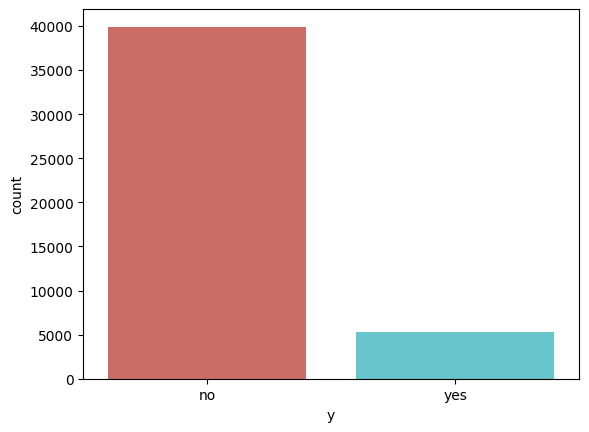

In [ ]:
sns.countplot(x="y",data=bk1,palette="hls")

<ipython-input-13-bb473a947e73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y",y="age",data=bk1,palette="hls")


<Axes: xlabel='y', ylabel='age'>

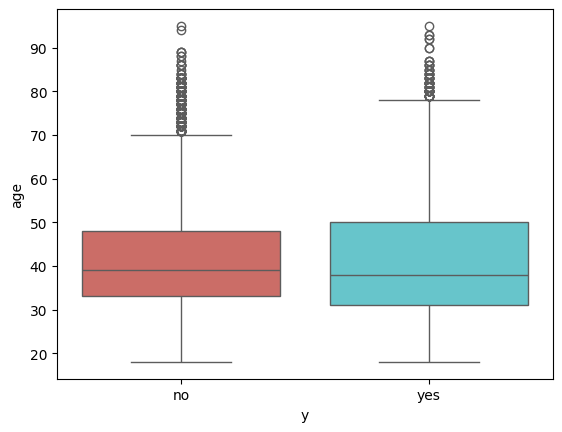

In [ ]:
sns.boxplot(x="y",y="age",data=bk1,palette="hls")

<ipython-input-14-b71266d9b3c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y",y="balance",data=bk1,palette="hls")


<Axes: xlabel='y', ylabel='balance'>

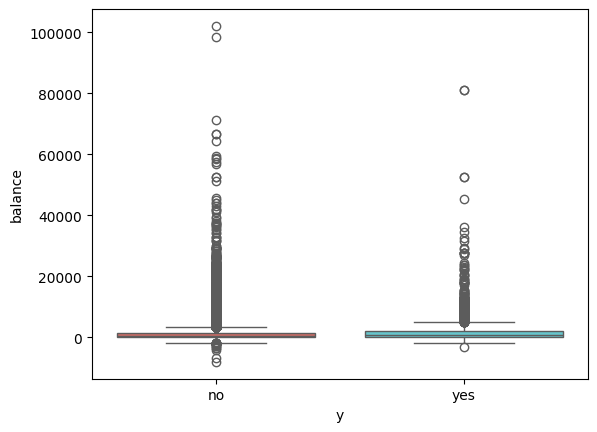

In [ ]:
sns.boxplot(x="y",y="balance",data=bk1,palette="hls")

<ipython-input-15-a63495ef71ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y",y="duration",data=bk1,palette="hls")


<Axes: xlabel='y', ylabel='duration'>

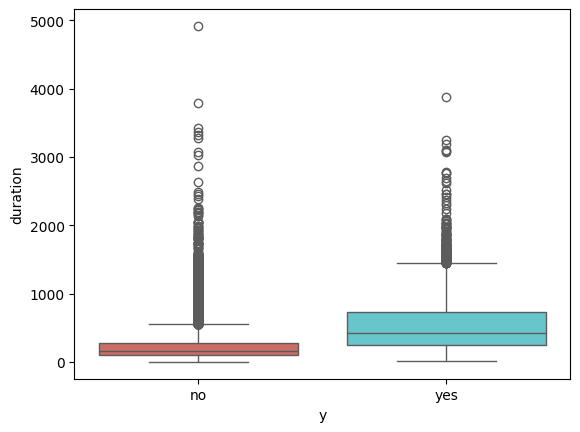

In [ ]:
sns.boxplot(x="y",y="duration",data=bk1,palette="hls")

In [ ]:
bk1["default"]=bk1["default"].astype(str)
bk1["housing"]=bk1["housing"].astype(str)
bk1["loan"]=bk1["loan"].astype(str)
bk1["y"]=bk1["y"].astype(str)

In [ ]:
bk1["default"]=np.where(bk1["default"].str.contains("yes"),1,0)
bk1["housing"]=np.where(bk1["housing"].str.contains("yes"),1,0)
bk1["loan"]=np.where(bk1["loan"].str.contains("yes"),1,0)
bk1["y"]=np.where(bk1["y"].str.contains("yes"),1,0)
bk1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
bk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [ ]:
bk1.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,...,0.004733,0.058592,0.031032,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,...,0.068637,0.234862,0.173407,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='age'>

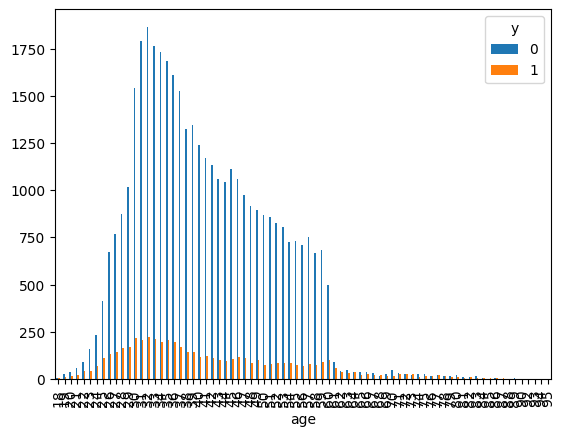

In [ ]:
pd.crosstab(bk1.age,bk1.y).plot(kind="bar")

In [ ]:
bk1.shape

(45211, 49)

In [ ]:
X = bk1.iloc[:,0:47]
Y = bk1.iloc[:,48]
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Co efficients of the features
classifier.coef_

array([[-2.47200628e-02, -1.41821483e-02,  3.51340731e-05,
        -3.98617733e-01, -1.05694722e-01, -9.75167358e-02,
         1.27167382e-04, -7.86769989e-01,  8.76350908e-04,
         1.75158191e-01,  2.25792498e-01, -2.10630438e-02,
        -1.60485032e-01, -1.09330768e-02,  1.85330985e-03,
         2.23944119e-02,  1.14430348e-01, -1.52240502e-02,
        -6.94139622e-02,  1.33993435e-02, -7.65809625e-02,
        -1.50588268e-03,  7.58153956e-03, -6.60476689e-03,
        -5.11442822e-02, -1.37798008e-01, -9.52833774e-03,
        -2.11276349e-01,  4.84497135e-03,  2.04126580e-02,
        -6.32459850e-02,  3.95757958e-02, -1.71876868e-01,
        -4.27973381e-02,  3.70219101e-04,  1.20661303e-01,
        -2.73781242e-01, -6.01146994e-02, -9.29645726e-02,
        -6.16390985e-03, -1.28865408e-01, -8.90142352e-03,
        -9.87257627e-02, -1.39756344e-01, -1.51320757e-02,
        -3.08533091e-01, -4.62795093e-02]])

In [ ]:
#Probability of values
classifier.predict_proba (X)

array([[9.81526713e-01, 1.84732873e-02],
       [9.83963396e-01, 1.60366038e-02],
       [9.78303595e-01, 2.16964055e-02],
       ...,
       [9.98417662e-01, 1.58233842e-03],
       [9.99112012e-01, 8.87988483e-04],
       [9.22888069e-01, 7.71119308e-02]])

In [ ]:
y_pred = classifier.predict(X)
bk1["y_pred"] = y_pred
bk1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_pred
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,1,0,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,1,0,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,1,0,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Combine Predicted values and probability values on the same table
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
bk2 = pd.concat([bk1,y_prob],axis=1)
bk2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_pred,0,1
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0.981527,0.018473
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0.983963,0.016037
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0.978304,0.021696
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0.980393,0.019607
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0.957926,0.042074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,0.996325,0.003675
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,0.994079,0.005921
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,0.998418,0.001582
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,0.999112,0.000888


In [ ]:
#Compare predicted values and actul values with a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[44604    28]
 [  577     2]]


In [ ]:
#Use Crosstab AV on cols and PV on rows. 1 is +ve class 0 is -ve class
pd.crosstab(y_pred,Y)

month_sep,0,1
row_0,,
0,44604,577
1,28,2


In [ ]:
#Accuracy TP+TN/TP+TN+FP+FN. Model has 98% Accuracy
accuracy = sum(Y==y_pred)/bk2.shape[0]
accuracy

0.9866183008559863

In [ ]:
#Overall accuracy is 99% .
#99% Precision in predicting true positive values
# it is a better model with with all high values including F1 score
from sklearn.metrics import classification_report
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44632
           1       0.07      0.00      0.01       579

    accuracy                           0.99     45211
   macro avg       0.53      0.50      0.50     45211
weighted avg       0.98      0.99      0.98     45211



In [ ]:
#ROC Curve- Area under the curve shows only 50%
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5014134394306803

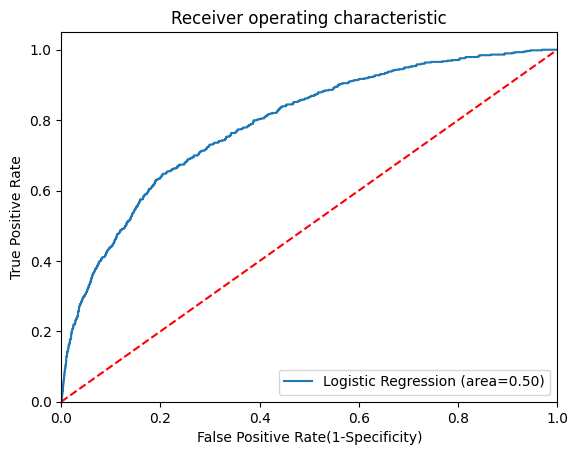

In [ ]:
#ROC Curve shows it is a good model.Area under the curve is
#Specificity - True Negetive rate
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])
y_prob1

,0
0,0.018473
1,0.016037
2,0.021696
3,0.019607
4,0.042074
...,...
45206,0.003675
45207,0.005921
45208,0.001582
45209,0.000888


In [ ]:
#Improve model to improve area under curve
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
logit = sm.Logit(Y, X)

In [ ]:
fpr

array([0.00000000e+00, 2.24054490e-05, 8.96217960e-05, ...,
       9.69214913e-01, 9.69214913e-01, 1.00000000e+00])

In [ ]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99827288, 1.        ,
       1.        ])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
0,2.000000e+00,0.987193
1,1.000000e+00,0.987193
2,9.757896e-01,0.987127
3,9.730458e-01,0.987105
4,5.467248e-01,0.986663
...,...,...
1104,5.890674e-05,0.066245
1105,5.889597e-05,0.066223
1106,7.570686e-06,0.043197
1107,7.567519e-06,0.043175


In [ ]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.019333


In [ ]:
#Overall accuracy readuced to 79% when compared to previous model.Previous model is better
threshold = 0.019333
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     44632
           1       0.04      0.65      0.07       579

    accuracy                           0.79     45211
   macro avg       0.52      0.72      0.48     45211
weighted avg       0.98      0.79      0.87     45211

